In [1]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Import analysis functions from sna_analysis module
from sna_analysis import (
    load_domestic_data,
    load_international_data,
    build_traffic_graph,
    compute_centrality_measures,
    basic_network_stats,
    DATA_DIR
)

# Define the path to the directory
folder_path = DATA_DIR  # Use DATA_DIR from sna_analysis module

# List the contents of the directory
files_in_folder = os.listdir(folder_path)

print(f"Files in '{folder_path}':")
print("=" * 60)
for item in sorted(files_in_folder):
    print(f"  - {item}")
print("=" * 60)
print(f"\nTotal files: {len(files_in_folder)}")

Files in 'd:\SNA-mini\Data':
  - 25Q1_4.xlsx
  - 25Q2_4.xlsx
  - DOM CITYPAIR DATA, APRIL 2025.xlsx
  - DOM CITYPAIR DATA, AUGUST 2025.xlsx
  - DOM CITYPAIR DATA, FEBRUARY 2025.xlsx
  - DOM CITYPAIR DATA, JANUARY 2025.xlsx
  - DOM CITYPAIR DATA, JULY 2025.xlsx
  - DOM CITYPAIR DATA, JUNE 2025.xlsx
  - DOM CITYPAIR DATA, MARCH 2025.xlsx
  - DOM CITYPAIR DATA, MAY 2025.xlsx
  - TABLE 5.01 (INDIAN CITY-WISE PASSENGER TRAFFIC) (2).xlsx

Total files: 11


In [2]:
# Load all domestic flight data files and merge them
print("Loading all domestic flight data files...")
print("=" * 60)
df_domestic = load_domestic_data(folder_path)

print(f"\n✓ Successfully loaded and merged {len(df_domestic)} domestic flight records")
print(f"  Source files: {df_domestic['SOURCE_FILE'].nunique()} files")
print(f"  Unique months: {sorted(df_domestic['SOURCE_FILE'].unique())}")

print("\n" + "=" * 60)
print("First few rows of merged domestic data:")
print("=" * 60)
print(df_domestic.head(10))

print("\n" + "=" * 60)
print("DataFrame Info:")
print("=" * 60)
df_domestic.info()

print("\n" + "=" * 60)
print("Summary Statistics:")
print("=" * 60)
print(f"Total records: {len(df_domestic)}")
print(f"Unique cities (CITY 1): {df_domestic['CITY 1'].nunique()}")
print(f"Unique cities (CITY 2): {df_domestic['CITY 2'].nunique()}")
print(f"Total unique cities: {pd.concat([df_domestic['CITY 1'], df_domestic['CITY 2']]).nunique()}")

Loading all domestic flight data files...


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
c:\Users\hp\AppData\Local\Programs\P


✓ Successfully loaded and merged 5049 domestic flight records
  Source files: 8 files
  Unique months: ['DOM CITYPAIR DATA, APRIL 2025.xlsx', 'DOM CITYPAIR DATA, AUGUST 2025.xlsx', 'DOM CITYPAIR DATA, FEBRUARY 2025.xlsx', 'DOM CITYPAIR DATA, JANUARY 2025.xlsx', 'DOM CITYPAIR DATA, JULY 2025.xlsx', 'DOM CITYPAIR DATA, JUNE 2025.xlsx', 'DOM CITYPAIR DATA, MARCH 2025.xlsx', 'DOM CITYPAIR DATA, MAY 2025.xlsx']

First few rows of merged domestic data:
          CITY 1          CITY 2  PASSENGERS TO CITY 2  \
0        ADAMPUR  HINDON AIRPORT                1431.0   
1       AGARTALA       BENGALURU                3847.0   
2       AGARTALA           DELHI                4833.0   
3       AGARTALA       DIBRUGARH                 420.0   
4       AGARTALA        GUWAHATI               14041.0   
5       AGARTALA       HYDERABAD                2757.0   
6       AGARTALA          IMPHAL                1880.0   
7       AGARTALA         KOLKATA               29428.0   
8  AGATTI ISLAND       BEN

In [3]:
# Build the domestic network graph
print("Building domestic flight network graph...")
print("=" * 60)
G_domestic = build_traffic_graph(df_domestic)

# Get network statistics
stats_domestic = basic_network_stats(G_domestic)

print(f"✓ Domestic Network Graph Created")
print(f"\nNetwork Statistics:")
print(f"  - Number of nodes (cities): {stats_domestic['num_nodes']}")
print(f"  - Number of edges (routes): {stats_domestic['num_edges']}")
print(f"  - Network density: {stats_domestic['density']:.6f}")
print("=" * 60)

Building domestic flight network graph...
✓ Domestic Network Graph Created

Network Statistics:
  - Number of nodes (cities): 129
  - Number of edges (routes): 838
  - Network density: 0.101502


In [4]:
# Calculate centrality measures for domestic network
print("Calculating centrality measures for domestic network...")
print("=" * 60)
centrality_domestic = compute_centrality_measures(G_domestic)

print("✓ Centrality measures calculated")
print("\nTop 15 Cities by Degree Centrality (Domestic):")
print("=" * 60)
top_degree_domestic = centrality_domestic.sort_values(by='Degree Centrality', ascending=False).head(15)
print(top_degree_domestic[['Degree Centrality']])

print("\nTop 15 Cities by Betweenness Centrality (Domestic):")
print("=" * 60)
top_betweenness_domestic = centrality_domestic.sort_values(by='Betweenness Centrality', ascending=False).head(15)
print(top_betweenness_domestic[['Betweenness Centrality']])

print("\nTop 15 Cities by Closeness Centrality (Domestic):")
print("=" * 60)
top_closeness_domestic = centrality_domestic.sort_values(by='Closeness Centrality', ascending=False).head(15)
print(top_closeness_domestic[['Closeness Centrality']])

Calculating centrality measures for domestic network...
✓ Centrality measures calculated

Top 15 Cities by Degree Centrality (Domestic):
             Degree Centrality
DELHI                 0.656250
BENGALURU             0.617188
HYDERABAD             0.609375
MUMBAI                0.593750
KOLKATA               0.476562
AHMEDABAD             0.421875
CHENNAI               0.406250
JAIPUR                0.351562
PUNE                  0.328125
BHUBANESWAR           0.289062
LUCKNOW               0.281250
GUWAHATI              0.273438
CHANDIGARH            0.242188
Goa                   0.234375
INDORE                0.234375

Top 15 Cities by Betweenness Centrality (Domestic):
            Betweenness Centrality
VIJAYAWADA                0.583108
DARBHANGA                 0.449496
PUNE                      0.443467
BAGDOGRA                  0.309670
AGARTALA                  0.228593
DehraDun                  0.202079
GUWAHATI                  0.198265
RAIPUR                    0.176550

In [5]:
# Load all international flight data files and merge them
print("Loading all international flight data files...")
print("=" * 60)
df_international = load_international_data(folder_path)

print(f"\n✓ Successfully loaded and merged {len(df_international)} international flight records")
print(f"  Source files: {df_international['SOURCE_FILE'].nunique()} files")
print(f"  Files: {sorted(df_international['SOURCE_FILE'].unique())}")

print("\n" + "=" * 60)
print("First few rows of merged international data:")
print("=" * 60)
print(df_international.head(10))

print("\n" + "=" * 60)
print("DataFrame Info:")
print("=" * 60)
df_international.info()

print("\n" + "=" * 60)
print("Summary Statistics:")
print("=" * 60)
print(f"Total records: {len(df_international)}")
print(f"Unique cities (CITY 1): {df_international['CITY 1'].nunique()}")
print(f"Unique cities (CITY 2): {df_international['CITY 2'].nunique()}")
print(f"Total unique cities: {pd.concat([df_international['CITY 1'], df_international['CITY 2']]).nunique()}")


Loading all international flight data files...

✓ Successfully loaded and merged 754 international flight records
  Source files: 2 files
  Files: ['25Q1_4.xlsx', '25Q2_4.xlsx']

First few rows of merged international data:
  SL.No.    CITY 1      CITY 2  PASSENGERS TO CITY 2  PASSENGERS FROM CITY 2  \
0      1  ABUDHABI   AHMEDABAD               44597.0                 55527.0   
1      2  ABUDHABI   BENGALURU               72050.0                 81142.0   
2      3  ABUDHABI  CHANDIGARH                7437.0                  9117.0   
3      4  ABUDHABI     CHENNAI               71614.0                 76888.0   
4      5  ABUDHABI  COIMBATORE                4395.0                  6199.0   
5      6  ABUDHABI       DELHI               99046.0                103626.0   
6      7  ABUDHABI   HYDERABAD               58235.0                 65088.0   
7      8  ABUDHABI      KANNUR               24015.0                 31561.0   
8      9  ABUDHABI       KOCHI              104327.0    

## Part 5: Build International Network Graph

Construct a network graph from the merged international flight data.



In [6]:
# Build the international network graph
print("Building international flight network graph...")
print("=" * 60)
G_international = build_traffic_graph(df_international)

# Get network statistics
stats_international = basic_network_stats(G_international)

print(f"✓ International Network Graph Created")
print(f"\nNetwork Statistics:")
print(f"  - Number of nodes (cities): {stats_international['num_nodes']}")
print(f"  - Number of edges (routes): {stats_international['num_edges']}")
print(f"  - Network density: {stats_international['density']:.6f}")
print("=" * 60)

Building international flight network graph...
✓ International Network Graph Created

Network Statistics:
  - Number of nodes (cities): 123
  - Number of edges (routes): 396
  - Network density: 0.052779


In [7]:
# Calculate centrality measures for international network
print("Calculating centrality measures for international network...")
print("=" * 60)
centrality_international = compute_centrality_measures(G_international)

print("✓ Centrality measures calculated")
print("\nTop 15 Cities by Degree Centrality (International):")
print("=" * 60)
top_degree_international = centrality_international.sort_values(by='Degree Centrality', ascending=False).head(15)
print(top_degree_international[['Degree Centrality']])

print("\nTop 15 Cities by Betweenness Centrality (International):")
print("=" * 60)
top_betweenness_international = centrality_international.sort_values(by='Betweenness Centrality', ascending=False).head(15)
print(top_betweenness_international[['Betweenness Centrality']])

print("\nTop 15 Cities by Closeness Centrality (International):")
print("=" * 60)
top_closeness_international = centrality_international.sort_values(by='Closeness Centrality', ascending=False).head(15)
print(top_closeness_international[['Closeness Centrality']])

Calculating centrality measures for international network...
✓ Centrality measures calculated

Top 15 Cities by Degree Centrality (International):
             Degree Centrality
DELHI                 0.590164
MUMBAI                0.393443
BENGALURU             0.295082
CHENNAI               0.213115
HYDERABAD             0.196721
DUBAI                 0.180328
KOCHI                 0.172131
ABUDHABI              0.172131
SHARJAH               0.172131
SINGAPORE             0.147541
DOHA                  0.139344
KUALALUMPUR           0.131148
MUSCAT                0.122951
KOZHIKODE             0.122951
BANGKOK               0.122951

Top 15 Cities by Betweenness Centrality (International):
            Betweenness Centrality
BENGALURU                 2.374892
DELHI                     2.201001
ISTANBUL                  0.668271
GUANGZHOU                 0.588677
MUMBAI                    0.241616
CHENNAI                   0.188942
SHENZHEN                  0.150389
GOA                

Visualize the domestic network with:
- Node size = Betweenness Centrality
- Node color = Degree Centrality
- Edge width = Passenger traffic volume



Creating visualization for domestic network...


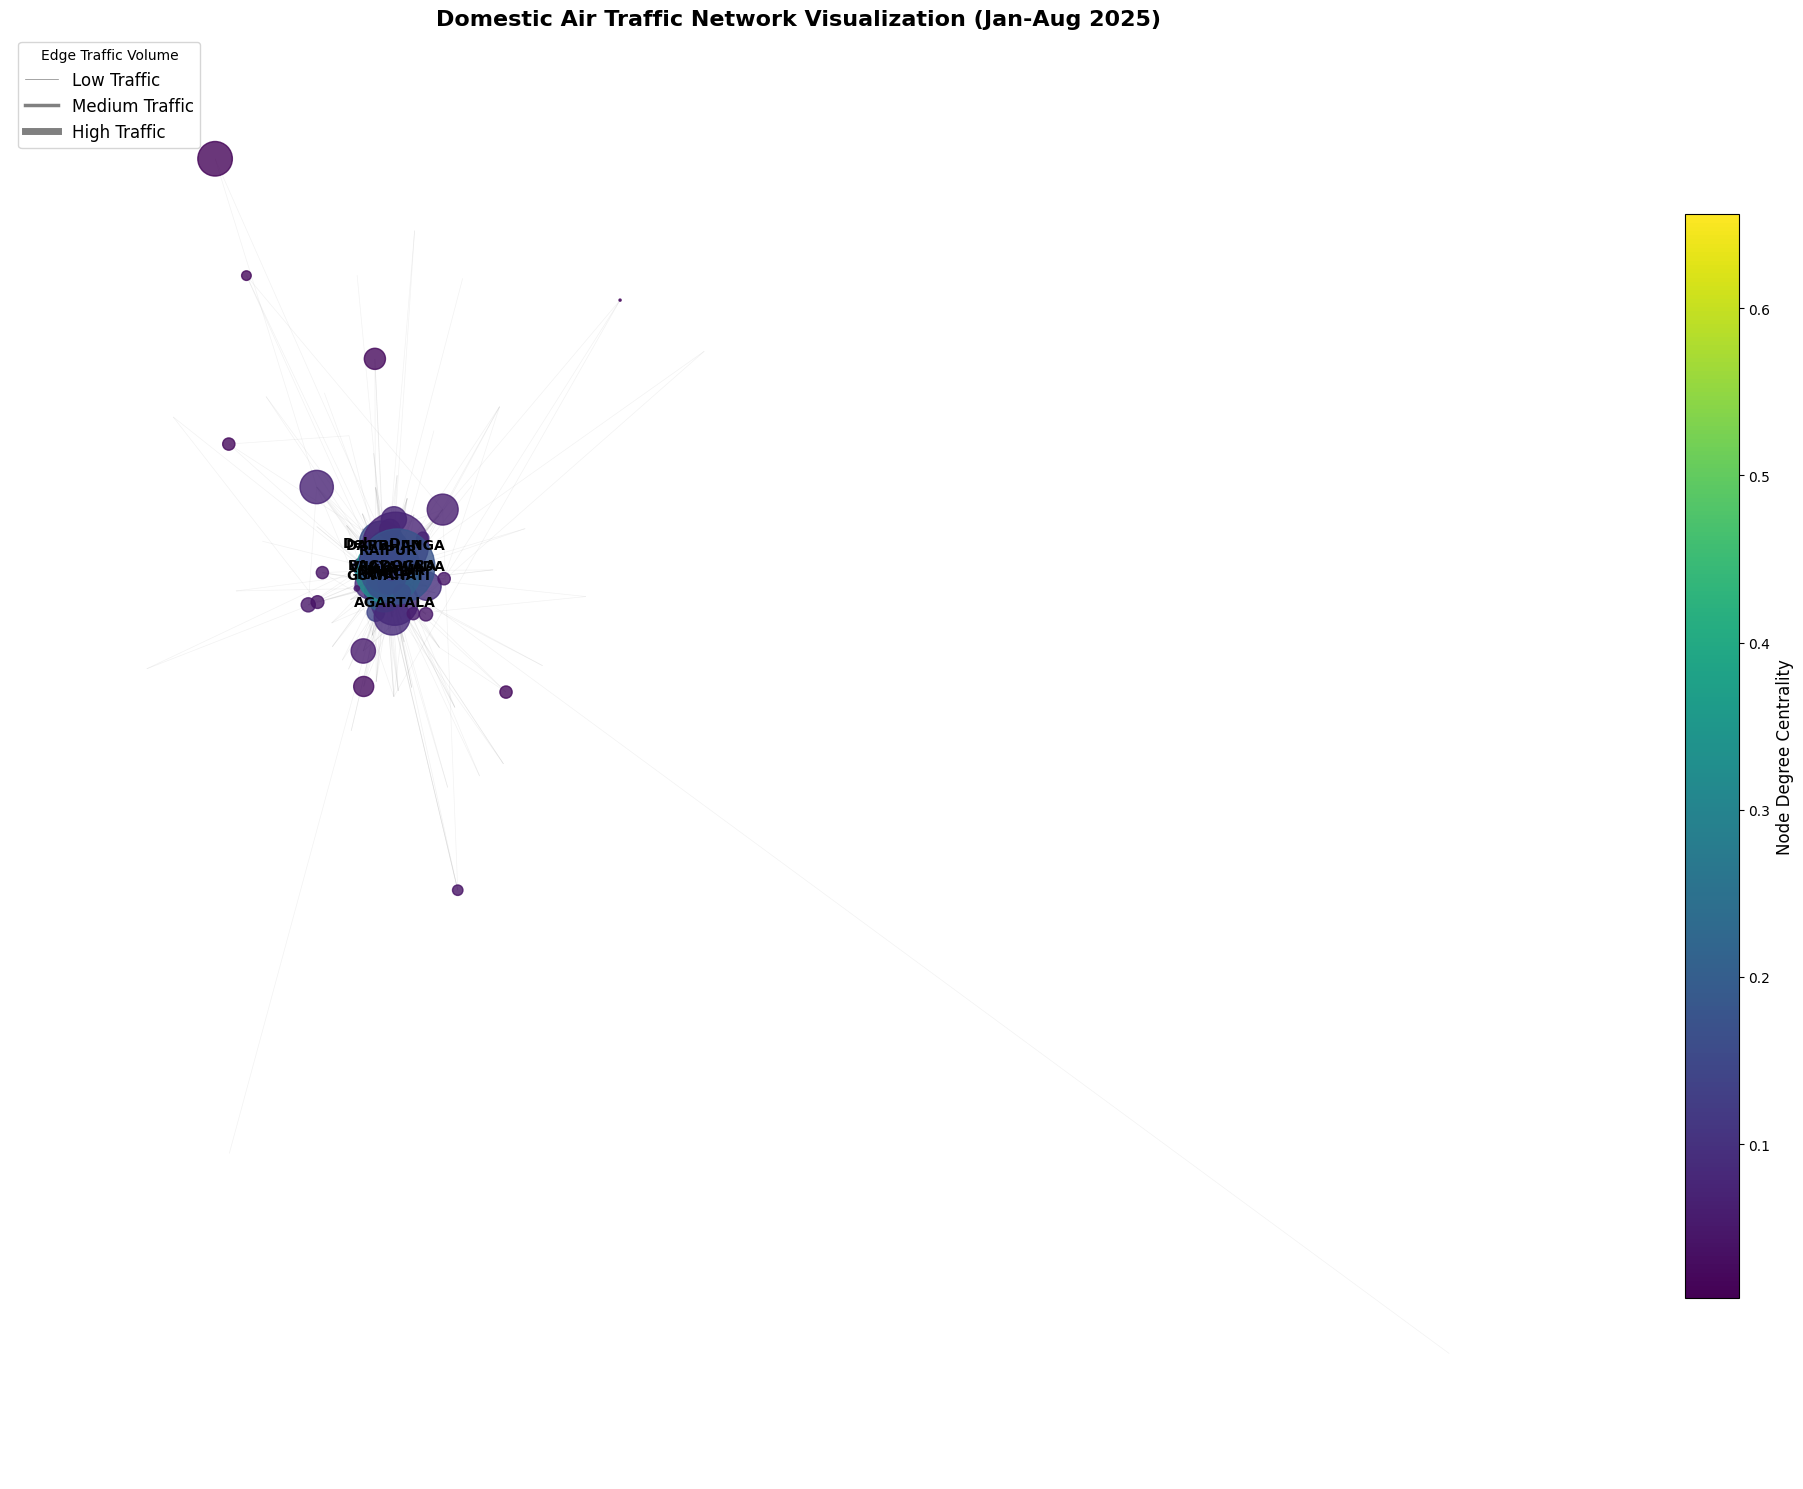

✓ Domestic network visualization completed


In [8]:
# Visualize Domestic Network
print("Creating visualization for domestic network...")

# Determine layout
pos_domestic = nx.spring_layout(G_domestic, k=0.15, iterations=50)

# Node sizes based on Betweenness Centrality
betweenness_domestic = nx.betweenness_centrality(G_domestic, weight='weight')
node_sizes_domestic = [v * 5000 for v in betweenness_domestic.values()]

# Node colors based on Degree Centrality
degree_centrality_domestic = nx.degree_centrality(G_domestic)
degree_values_domestic = list(degree_centrality_domestic.values())
norm_domestic = mcolors.Normalize(vmin=min(degree_values_domestic), vmax=max(degree_values_domestic))
cmap = plt.cm.viridis
node_colors_domestic = [cmap(norm_domestic(value)) for value in degree_values_domestic]

# Edge widths based on weight attribute
edges_domestic = G_domestic.edges(data=True)
edge_weights_domestic = [d.get('weight', 1) for u, v, d in edges_domestic]
max_weight_domestic = max(edge_weights_domestic) if edge_weights_domestic else 1
edge_widths_domestic = [(w / max_weight_domestic) * 5 + 0.5 for w in edge_weights_domestic]

# Create figure
fig, ax = plt.subplots(figsize=(20, 15))

# Draw nodes
nx.draw_networkx_nodes(G_domestic, pos_domestic, node_size=node_sizes_domestic, 
                       node_color=node_colors_domestic, alpha=0.8, ax=ax)

# Draw edges
nx.draw_networkx_edges(G_domestic, pos_domestic, width=edge_widths_domestic, 
                       alpha=0.1, edge_color='gray', ax=ax)

# Add labels for top 10 cities by Betweenness Centrality
top_nodes_domestic = centrality_domestic.sort_values(by='Betweenness Centrality', ascending=False).head(10).index.tolist()
labels_domestic = {node: node for node in top_nodes_domestic}
nx.draw_networkx_labels(G_domestic, pos_domestic, labels=labels_domestic, 
                       font_size=10, font_weight='bold', ax=ax)

# Colorbar for Degree Centrality
sm_domestic = plt.cm.ScalarMappable(cmap=cmap, norm=norm_domestic)
sm_domestic.set_array(degree_values_domestic)
cb_domestic = fig.colorbar(sm_domestic, ax=ax, orientation='vertical', shrink=0.75)
cb_domestic.set_label('Node Degree Centrality', fontsize=12)

# Legend for edge widths
legend_elements = [
    Line2D([0], [0], color='gray', lw=0.5, label='Low Traffic'),
    Line2D([0], [0], color='gray', lw=2.5, label='Medium Traffic'),
    Line2D([0], [0], color='gray', lw=5.0, label='High Traffic')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, title='Edge Traffic Volume')

# Title
ax.set_title('Domestic Air Traffic Network Visualization (Jan-Aug 2025)', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.show()
print("✓ Domestic network visualization completed")

Creating visualization for international network...


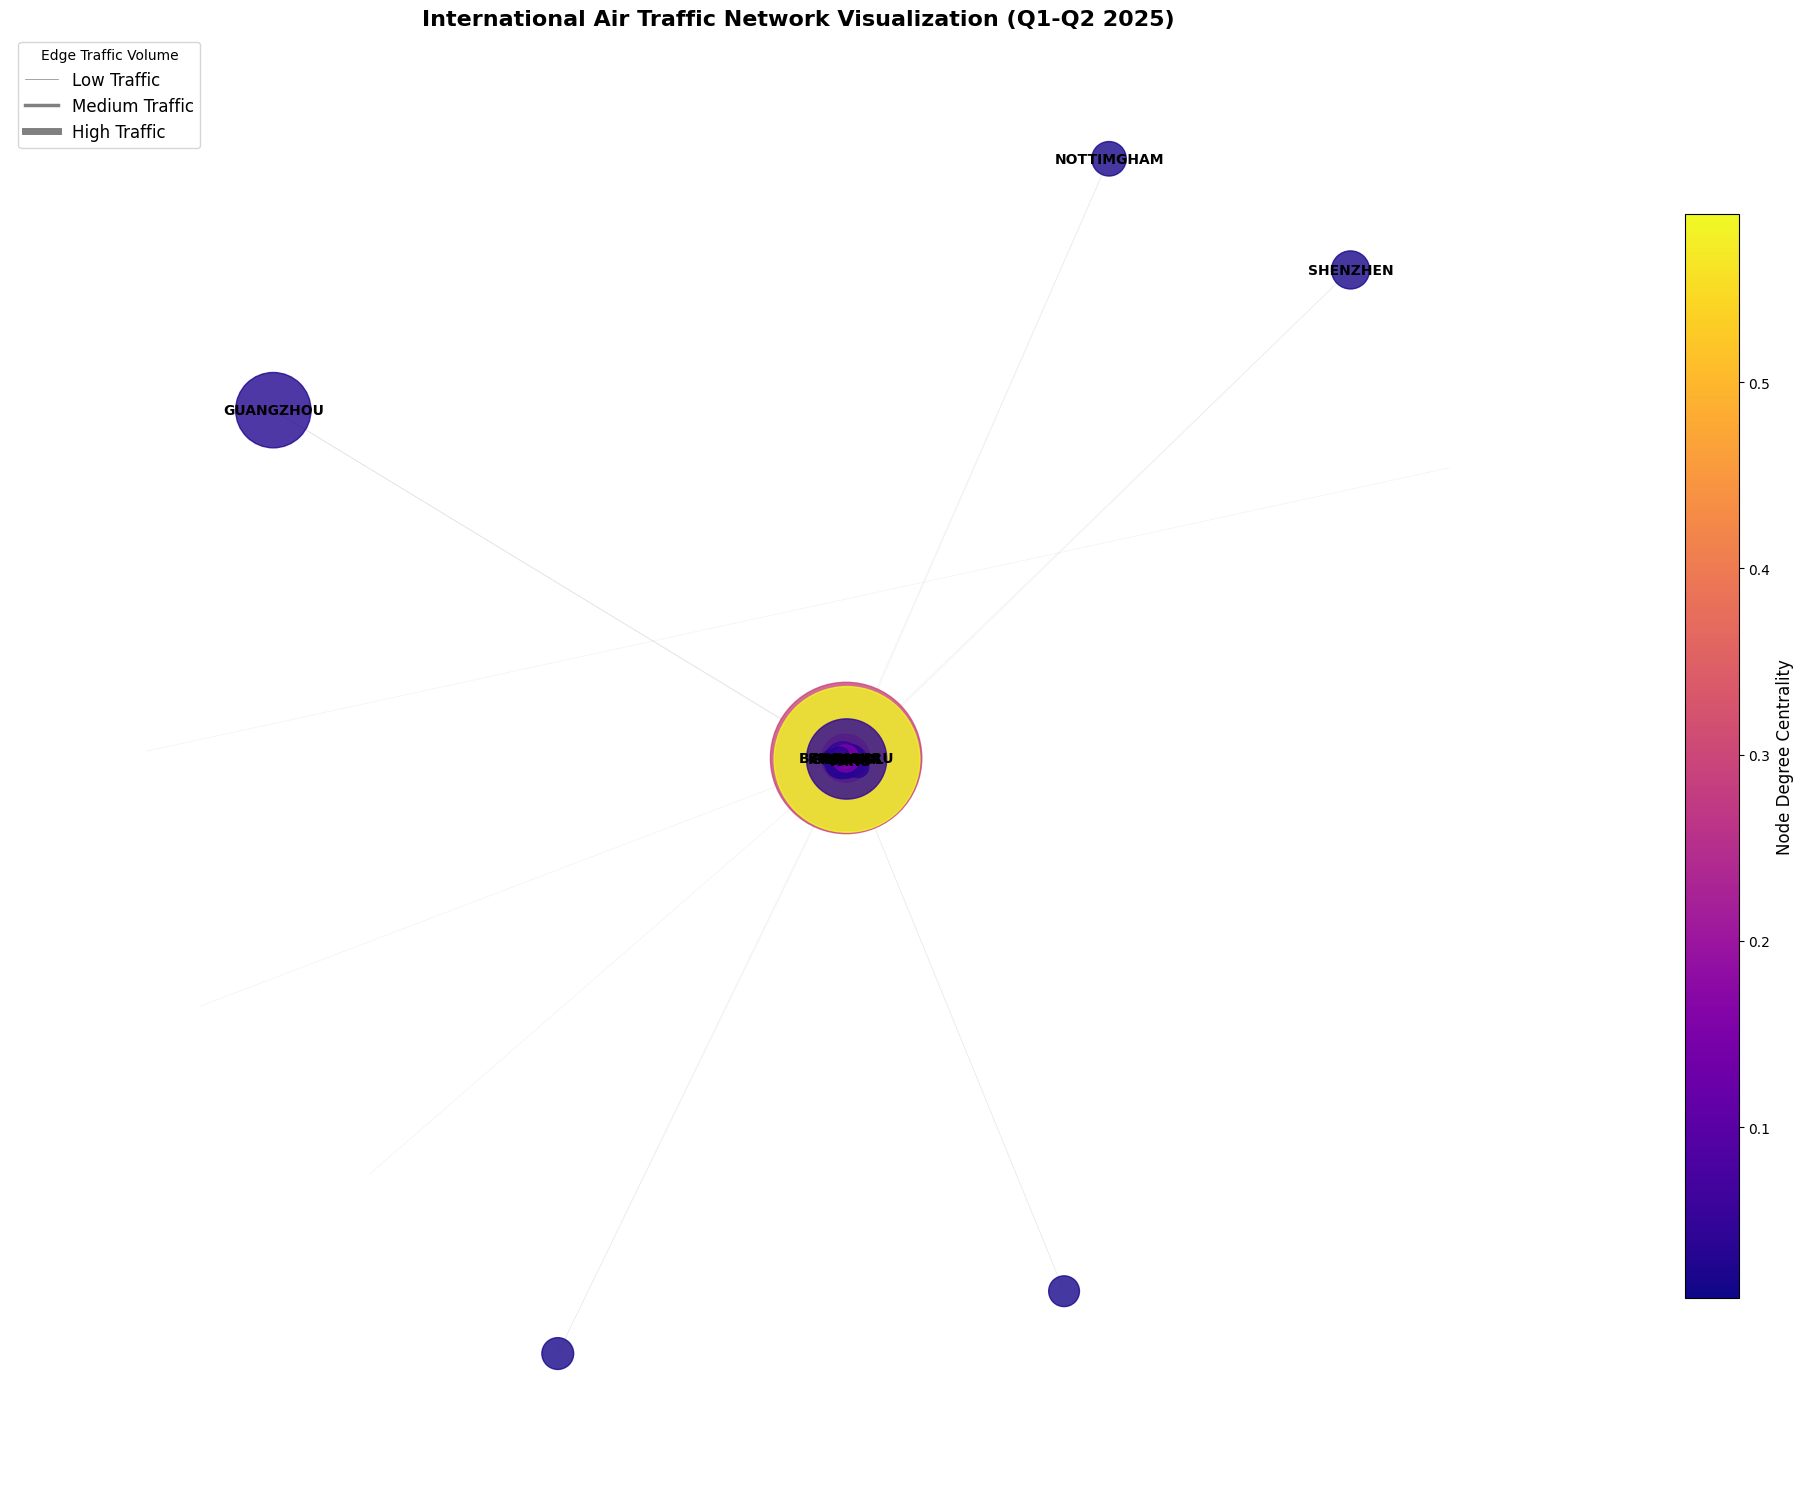

✓ International network visualization completed


In [9]:
# Visualize International Network
print("Creating visualization for international network...")

# Determine layout
pos_international = nx.spring_layout(G_international, k=0.15, iterations=50)

# Node sizes based on Betweenness Centrality
betweenness_international = nx.betweenness_centrality(G_international, weight='weight')
node_sizes_international = [v * 5000 for v in betweenness_international.values()]

# Node colors based on Degree Centrality
degree_centrality_international = nx.degree_centrality(G_international)
degree_values_international = list(degree_centrality_international.values())
norm_international = mcolors.Normalize(vmin=min(degree_values_international), vmax=max(degree_values_international))
cmap = plt.cm.plasma
node_colors_international = [cmap(norm_international(value)) for value in degree_values_international]

# Edge widths based on weight attribute
edges_international = G_international.edges(data=True)
edge_weights_international = [d.get('weight', 1) for u, v, d in edges_international]
max_weight_international = max(edge_weights_international) if edge_weights_international else 1
edge_widths_international = [(w / max_weight_international) * 5 + 0.5 for w in edge_weights_international]

# Create figure
fig, ax = plt.subplots(figsize=(20, 15))

# Draw nodes
nx.draw_networkx_nodes(G_international, pos_international, node_size=node_sizes_international, 
                      node_color=node_colors_international, alpha=0.8, ax=ax)

# Draw edges
nx.draw_networkx_edges(G_international, pos_international, width=edge_widths_international, 
                       alpha=0.1, edge_color='gray', ax=ax)

# Add labels for top 10 cities by Betweenness Centrality
top_nodes_international = centrality_international.sort_values(by='Betweenness Centrality', ascending=False).head(10).index.tolist()
labels_international = {node: node for node in top_nodes_international}
nx.draw_networkx_labels(G_international, pos_international, labels=labels_international, 
                       font_size=10, font_weight='bold', ax=ax)

# Colorbar for Degree Centrality
sm_international = plt.cm.ScalarMappable(cmap=cmap, norm=norm_international)
sm_international.set_array(degree_values_international)
cb_international = fig.colorbar(sm_international, ax=ax, orientation='vertical', shrink=0.75)
cb_international.set_label('Node Degree Centrality', fontsize=12)

# Legend for edge widths
legend_elements = [
    Line2D([0], [0], color='gray', lw=0.5, label='Low Traffic'),
    Line2D([0], [0], color='gray', lw=2.5, label='Medium Traffic'),
    Line2D([0], [0], color='gray', lw=5.0, label='High Traffic')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, title='Edge Traffic Volume')

# Title
ax.set_title('International Air Traffic Network Visualization (Q1-Q2 2025)', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.show()
print("✓ International network visualization completed")

In [10]:
# Comparative Analysis
print("=" * 80)
print("COMPARATIVE ANALYSIS: DOMESTIC vs INTERNATIONAL NETWORKS")
print("=" * 80)

# Network Statistics Comparison
print("\n📊 Network Statistics Comparison:")
print("-" * 80)
comparison_stats = pd.DataFrame({
    'Domestic': [
        stats_domestic['num_nodes'],
        stats_domestic['num_edges'],
        f"{stats_domestic['density']:.6f}"
    ],
    'International': [
        stats_international['num_nodes'],
        stats_international['num_edges'],
        f"{stats_international['density']:.6f}"
    ]
}, index=['Number of Nodes (Cities)', 'Number of Edges (Routes)', 'Network Density'])
print(comparison_stats)

# Top Cities Comparison
print("\n" + "=" * 80)
print("🏆 Top 5 Cities by Centrality Measures:")
print("=" * 80)

print("\n📍 DOMESTIC NETWORK:")
print("-" * 80)
print("Top 5 by Degree Centrality:")
print(top_degree_domestic.head(5)[['Degree Centrality']])
print("\nTop 5 by Betweenness Centrality:")
print(top_betweenness_domestic.head(5)[['Betweenness Centrality']])
print("\nTop 5 by Closeness Centrality:")
print(top_closeness_domestic.head(5)[['Closeness Centrality']])

print("\n" + "-" * 80)
print("📍 INTERNATIONAL NETWORK:")
print("-" * 80)
print("Top 5 by Degree Centrality:")
print(top_degree_international.head(5)[['Degree Centrality']])
print("\nTop 5 by Betweenness Centrality:")
print(top_betweenness_international.head(5)[['Betweenness Centrality']])
print("\nTop 5 by Closeness Centrality:")
print(top_closeness_international.head(5)[['Closeness Centrality']])

print("\n" + "=" * 80)

COMPARATIVE ANALYSIS: DOMESTIC vs INTERNATIONAL NETWORKS

📊 Network Statistics Comparison:
--------------------------------------------------------------------------------
                          Domestic International
Number of Nodes (Cities)       129           123
Number of Edges (Routes)       838           396
Network Density           0.101502      0.052779

🏆 Top 5 Cities by Centrality Measures:

📍 DOMESTIC NETWORK:
--------------------------------------------------------------------------------
Top 5 by Degree Centrality:
           Degree Centrality
DELHI               0.656250
BENGALURU           0.617188
HYDERABAD           0.609375
MUMBAI              0.593750
KOLKATA             0.476562

Top 5 by Betweenness Centrality:
            Betweenness Centrality
VIJAYAWADA                0.583108
DARBHANGA                 0.449496
PUNE                      0.443467
BAGDOGRA                  0.309670
AGARTALA                  0.228593

Top 5 by Closeness Centrality:
            

In [11]:
# Summary of Key Findings
print("=" * 80)
print("KEY FINDINGS AND INSIGHTS")
print("=" * 80)

print("\n📈 DOMESTIC NETWORK ANALYSIS:")
print("-" * 80)
print(f"• Network Scale: {stats_domestic['num_nodes']} cities connected by {stats_domestic['num_edges']} routes")
print(f"• Network Density: {stats_domestic['density']:.6f} (indicates connectivity level)")
print(f"• Top Hub (Degree): {top_degree_domestic.index[0]}")
print(f"• Top Hub (Betweenness): {top_betweenness_domestic.index[0]}")
print(f"• Top Hub (Closeness): {top_closeness_domestic.index[0]}")

print("\n🌍 INTERNATIONAL NETWORK ANALYSIS:")
print("-" * 80)
print(f"• Network Scale: {stats_international['num_nodes']} cities connected by {stats_international['num_edges']} routes")
print(f"• Network Density: {stats_international['density']:.6f} (indicates connectivity level)")
print(f"• Top Hub (Degree): {top_degree_international.index[0]}")
print(f"• Top Hub (Betweenness): {top_betweenness_international.index[0]}")
print(f"• Top Hub (Closeness): {top_closeness_international.index[0]}")

print("\n💡 KEY INSIGHTS:")
print("-" * 80)
print("• The analysis reveals the hub-and-spoke structure of Indian air traffic networks")
print("• Major metropolitan cities serve as critical connection hubs")
print("• Network density indicates the level of direct connectivity between cities")
print("• Centrality measures help identify the most strategically important cities")
print("• Separate analysis of domestic and international networks shows different patterns")

print("\n" + "=" * 80)
print("✓ Analysis Complete!")
print("=" * 80)


KEY FINDINGS AND INSIGHTS

📈 DOMESTIC NETWORK ANALYSIS:
--------------------------------------------------------------------------------
• Network Scale: 129 cities connected by 838 routes
• Network Density: 0.101502 (indicates connectivity level)
• Top Hub (Degree): DELHI
• Top Hub (Betweenness): VIJAYAWADA
• Top Hub (Closeness): DARBHANGA

🌍 INTERNATIONAL NETWORK ANALYSIS:
--------------------------------------------------------------------------------
• Network Scale: 123 cities connected by 396 routes
• Network Density: 0.052779 (indicates connectivity level)
• Top Hub (Degree): DELHI
• Top Hub (Betweenness): BENGALURU
• Top Hub (Closeness): BENGALURU

💡 KEY INSIGHTS:
--------------------------------------------------------------------------------
• The analysis reveals the hub-and-spoke structure of Indian air traffic networks
• Major metropolitan cities serve as critical connection hubs
• Network density indicates the level of direct connectivity between cities
• Centrality measu

In [12]:
import networkx as nx
import pandas as pd

# 1. Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='TOTAL_PASSENGERS') # Use edge weights for betweenness

# 3. Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G, distance='TOTAL_PASSENGERS') # Use edge weights for closeness (higher weight means shorter distance)

# 4. Create a Pandas DataFrame to store the centrality measures
centrality_df = pd.DataFrame({
    'Degree Centrality': pd.Series(degree_centrality),
    'Betweenness Centrality': pd.Series(betweenness_centrality),
    'Closeness Centrality': pd.Series(closeness_centrality)
})

# 5. Sort and display the top 10 cities for each centrality measure
print("\nTop 10 Cities by Degree Centrality:")
print(centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10))

print("\nTop 10 Cities by Betweenness Centrality:")
print(centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10))

print("\nTop 10 Cities by Closeness Centrality:")
print(centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10))

NameError: name 'G' is not defined

## Visualize the Social Network

### Subtask:
Generate a visualization of the social network graph, highlighting key aspects or findings from the analysis, and ensure all legends are provided.


**Reasoning**:
To visualize the social network graph, I will generate a plot using `networkx` and `matplotlib`. I need to define node sizes based on Betweenness Centrality, node colors based on Degree Centrality, and edge widths based on total passenger traffic, then add appropriate labels, a colorbar, and a legend.



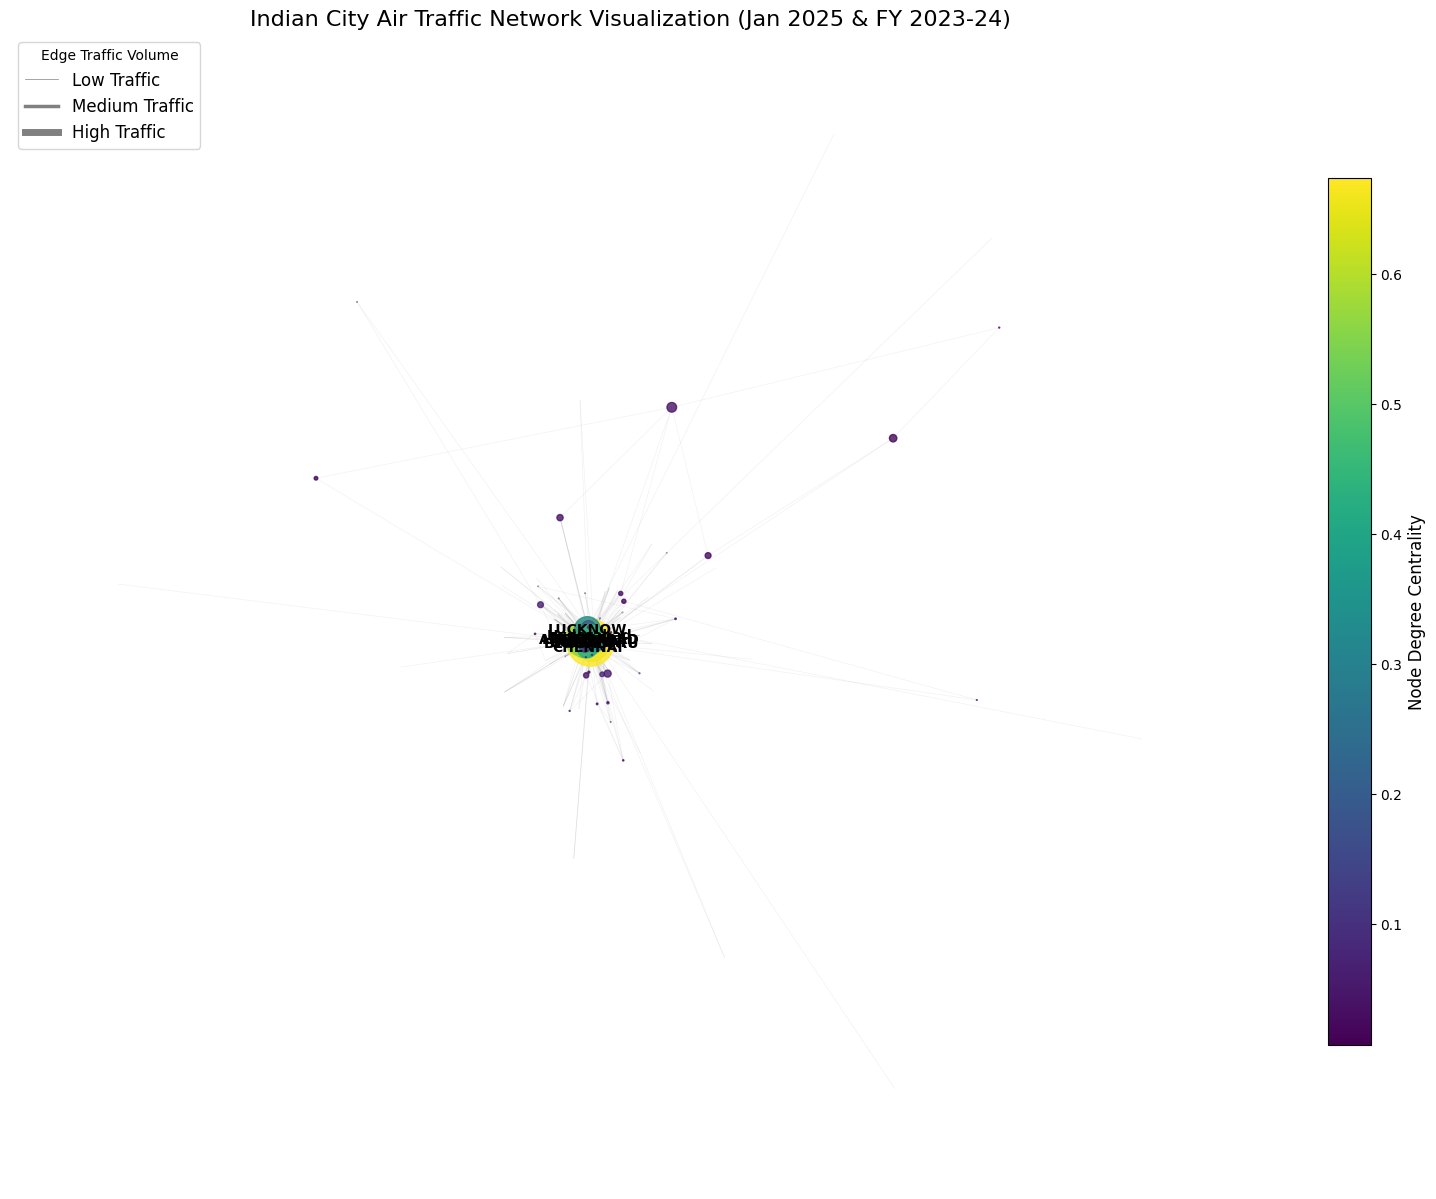

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# 1. Determine a suitable layout for the graph
pos = nx.spring_layout(G, k=0.15, iterations=50) # k is optimal distance between nodes

# Prepare node sizes and colors based on centrality measures
# Node size based on Betweenness Centrality
node_sizes = [v * 5000 for v in nx.betweenness_centrality(G, weight='TOTAL_PASSENGERS').values()]

# Node color based on Degree Centrality
degree_centrality_values = list(nx.degree_centrality(G).values())
norm = mcolors.Normalize(vmin=min(degree_centrality_values), vmax=max(degree_centrality_values))
cmap = plt.cm.viridis # Choose a colormap
node_colors = [cmap(norm(value)) for value in degree_centrality_values]

# Edge widths based on 'weight' attribute (total passengers)
edges = G.edges(data=True)
edge_weights = [d['weight'] for u, v, d in edges]
# Scale edge weights for better visualization, avoid zero weights
max_weight = max(edge_weights) if edge_weights else 1
edge_widths = [(w / max_weight) * 5 + 0.5 for w in edge_weights] # Scale to a visible range, add a base width

# 2. Create a figure and an axes object for the plot
fig, ax = plt.subplots(figsize=(20, 15))

# 3. Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8, ax=ax)

# 4. Draw the edges
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.1, edge_color='gray', ax=ax)

# 5. Add labels to the nodes (top 10 by Betweenness Centrality)
top_nodes = centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10).index.tolist()
labels = {node: node for node in top_nodes}

nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold', ax=ax)

# 6. Create a colorbar for node colors (Degree Centrality)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(degree_centrality_values)
cb = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.75)
cb.set_label('Node Degree Centrality', fontsize=12)

# 7. Create a separate legend for edge widths (traffic volume)
legend_elements = [
    Line2D([0], [0], color='gray', lw=0.5, label='Low Traffic'),
    Line2D([0], [0], color='gray', lw=2.5, label='Medium Traffic'),
    Line2D([0], [0], color='gray', lw=5.0, label='High Traffic')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, title='Edge Traffic Volume')

# 8. Add a title to the plot
ax.set_title('Indian City Air Traffic Network Visualization (Jan 2025 & FY 2023-24)', fontsize=16)

# 9. Turn off the axis for a cleaner look
ax.set_axis_off()

# 10. Display the plot
plt.show()

## Final Task

### Subtask:
Summarize the key findings and insights from the social network analysis performed on the data.


## Summary:

### Data Analysis Key Findings

*   **Data Identification & Preparation**: Relevant Excel files (`DOM CITYPAIR DATA, JANUARY 2025.xlsx` and `TABLE 5.01 (INDIAN CITY-WISE PASSENGER TRAFFIC) (2).xlsx`) were identified, loaded, and cleaned. This involved handling complex multi-row headers, standardizing column names, converting numerical fields, and dropping irrelevant rows/columns.
*   **Network Structure**: A social network graph was successfully constructed using `networkx`, comprising **139 nodes** (cities) and **951 edges** (city pairs), with edges weighted by total passenger traffic.
*   **Centrality Measures**:
    *   **DELHI** consistently ranked as the top city across Degree, Betweenness, and Closeness Centrality measures, underscoring its pivotal role in the air traffic network.
    *   **BENGALURU** and **MUMBAI** also demonstrated high centrality across all measures, establishing them as significant secondary hubs.
    *   Other important cities in terms of connectivity and influence include HYDERABAD, KOLKATA, CHENNAI, and AHMEDABAD.
*   **Network Visualization**: A comprehensive visualization of the network was created, using node size to represent Betweenness Centrality, node color to indicate Degree Centrality, and edge width to show traffic volume.

### Insights or Next Steps

*   The Indian air traffic network appears to follow a centralized hub-and-spoke model, with Delhi as the primary hub and Bengaluru and Mumbai as key secondary hubs, suggesting efficient routing through these major cities.
*   Future analysis could explore temporal dynamics by incorporating data from other months to identify seasonal variations or long-term trends in network structure and city importance.
